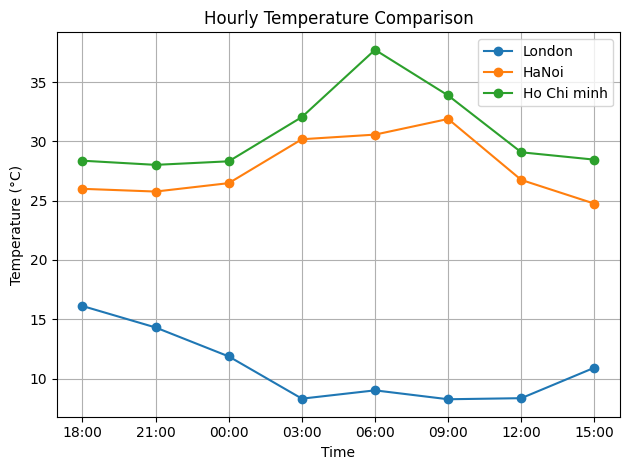

In [90]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
import requests
from geopy.geocoders import Nominatim
from timezonefinder import TimezoneFinder
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Initialize the main window
root = Tk()
root.title("Weather App")
root.geometry("900x500+300+200")
root.resizable(False, False)

# Store cities in list for displaying in listbox
cities = []

# Fetch and display current weather data
def getWeather():
    city = textfield.get()

    geolocation = Nominatim(user_agent="WeatherApp4.0CuaTui")
    location = geolocation.geocode(city)
    if location is None:
        messagebox.showerror("Error", "City not found")
        return

    # Get time zone and local time
    obj = TimezoneFinder()
    result = obj.timezone_at(lng=location.longitude, lat=location.latitude)
    home = pytz.timezone(result)
    local_time = datetime.now(home)
    current_time = local_time.strftime("%I:%M %p")
    clock.config(text=current_time)
    name.config(text="Current Weather")

    # Call OpenWeatherMap API 
    api = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid=e912b8897dbb56ab43a4a4038bde1522&units=metric"
    json_data = requests.get(api).json()

    if json_data.get("cod") != 200:
        messagebox.showerror("Error", json_data.get("message", "Weather data not available"))
        return

    # Extract and display weather details
    weather_condition = json_data['weather'][0]['main']
    weather_description = json_data['weather'][0]['description']
    temp = json_data['main']['temp']
    pressure = json_data['main']['pressure']
    humidity = json_data['main']['humidity']
    wind = json_data['wind']['speed']

    t.config(text=f"{temp}°C")
    c.config(text=f"{weather_condition} | FEELS LIKE {temp}°C")

    w.config(text=f"{wind} km/h")
    h.config(text=f"{humidity}%")
    d.config(text=weather_description)
    p.config(text=f"{pressure} hPa")

# Add to listbox
def addCity():
    city = textfield.get()
    if city:  # Check if the city field is not empty
        cities.append(city)  # Add city to the list
        listbox.insert(END, city)  # Insert city to the listbox
    else:
        messagebox.showwarning("Input Error", "Please enter a valid city name.")

# Function to delete selected city from listbox
def deleteCity():
    try:
        # Get selected city index
        selected_index = listbox.curselection()
        if selected_index:
            selected_city = listbox.get(selected_index)
            cities.remove(selected_city)  # Remove city from cities list
            listbox.delete(selected_index)  # Remove city from listbox
        else:
            messagebox.showwarning("Warning", "Please select a city to delete.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Function to compare cities' hourly temperatures
def compareCities():
    if len(cities) < 2:
        messagebox.showerror("Error", "Please select at least two cities to compare.")
        return

    temp_data = []
    times = []

    for city in cities:
        api = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid=e912b8897dbb56ab43a4a4038bde1522&units=metric"
        json_data = requests.get(api).json()

        if json_data.get("cod") != "200":
            messagebox.showerror("Error", f"Weather data not available for {city}")
            return

        city_temps = []
        timestamps = []

        # next 8 time points (24 hours, every 3 hours)
        for entry in json_data['list'][:8]: 
            time = entry['dt_txt'][11:16]
            temp = entry['main']['temp']
            timestamps.append(time)
            city_temps.append(temp)

        temp_data.append(city_temps)
        if not times:
            times = timestamps  # Set time labels 

    plotComparison(cities, times, temp_data)

# Function to plot temperature comparison chart using matplotlib
def plotComparison(cities, times, temp_data):
    fig, ax = plt.subplots()

    # Plot each city's data
    for i, city in enumerate(cities):
        ax.plot(times, temp_data[i], marker='o', label=city)

    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title('Hourly Temperature Comparison')
    ax.legend()
    ax.grid()

    plt.xticks()
    plt.tight_layout()
    plt.show()


# Search bar image 
Search_image = PhotoImage(file="images/search.png")
myimage = Label(image=Search_image)
myimage.place(x=20, y=20)

# Input field
textfield = tk.Entry(root, justify="center", width=20, font=("poppins", 25, "bold"), border=0, bg="#404040", fg="white")
textfield.place(x=50, y=40)
textfield.focus()

# Search button
Search_icon = PhotoImage(file="images/search_icon.png")
myimageIcon = Button(image=Search_icon, borderwidth=0, bg="#404040", cursor="hand2", command=getWeather)
myimageIcon.place(x=400, y=34)

# Logo and layout images
logo_image = PhotoImage(file="images/logo.png")
logo = Label(image=logo_image)
logo.place(x=150, y=100)

Frame_image = PhotoImage(file="images/box.png")
Frame_myimage = Label(image=Frame_image)
Frame_myimage.pack(padx=5, pady=5, side=BOTTOM)

# Time and current weather 
name = Label(root, font=("arial", 15, "bold"))
name.place(x=30, y=100)
clock = Label(root, font=('Helvetica', 20))
clock.place(x=30, y=130)

# weather metrics
label1 = Label(root, text="WIND", font=("poppins", 15, "bold"), bg="#1ab5ef", fg="white")
label1.place(x=120, y=400)

label2 = Label(root, text="HUMIDITY", font=("poppins", 15, "bold"), bg="#1ab5ef", fg="white")
label2.place(x=250, y=400)

label3 = Label(root, text="DESCRIPTION", font=("poppins", 15, "bold"), bg="#1ab5ef", fg="white")
label3.place(x=430, y=400)

label4 = Label(root, text="PRESSURE", font=("poppins", 15, "bold"), bg="#1ab5ef", fg="white")
label4.place(x=650, y=400)

# temperature and condition
t = Label(font=('arial', 70, 'bold'), fg="#ee666d")
t.place(x=400, y=150)

c = Label(font=('arial', 15, 'bold'))
c.place(x=400, y=250)

# detailed weather value
w = Label(text="...", font=('arial', 20, 'bold'), bg='#1ab5ef')
w.place(x=120, y=430)

h = Label(text="...", font=('arial', 20, 'bold'), bg='#1ab5ef')
h.place(x=280, y=430)

d = Label(text="...", font=('arial', 20, 'bold'), bg='#1ab5ef')
d.place(x=430, y=430)

p = Label(text="...", font=('arial', 20, 'bold'), bg='#1ab5ef')
p.place(x=670, y=430)

# listbox and buttons
listbox = Listbox(root, height=4, width=30)
listbox.place(x=600, y=50)

add_button = Button(root, text="Add City", font=("poppins", 12), command=addCity)
add_button.place(x=600, y=130)

delete_button = Button(root, text="Delete City", font=("poppins", 12), command=deleteCity)
delete_button.place(x=750, y=180)

compare_button = Button(root, text="Compare", font=("poppins", 12), command=compareCities)
compare_button.place(x=700, y=130)

root.mainloop()
